### Import

In [1]:
from MFEA_lib.model import SMP_MFEA, MFEA_base, SA_MFEA, AbstractModel
from MFEA_lib.model.utils import *
from MFEA_lib.operators.Crossover import *
from MFEA_lib.operators.Mutation import *
from MFEA_lib.operators.Selection import *
from MFEA_lib.operators.Search import *
from MFEA_lib.tasks.Benchmark.Competitions import CEC17_benchmark, GECCO20_benchmark_50tasks, WCCI22_benchmark

import os 
import sys 
import numpy as np 
import pandas as pd
import scipy 


In [15]:
model = loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/ALL_RESULT\S-MFEA_CEC17_PYTHON.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])

C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/ALL_RESULT\S-MFEA_CEC17_PYTHON.mso


In [9]:
model.ls_model[21] = model.ls_model[0] 

In [10]:
model.ls_model[3] = model.ls_model[0] 

In [11]:
model.set_attribute()

In [14]:
saveModel(model, PATH="C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/ALL_RESULT\S-MFEA_CEC17_PYTHON.mso", remove_tasks= True)

'Saved'

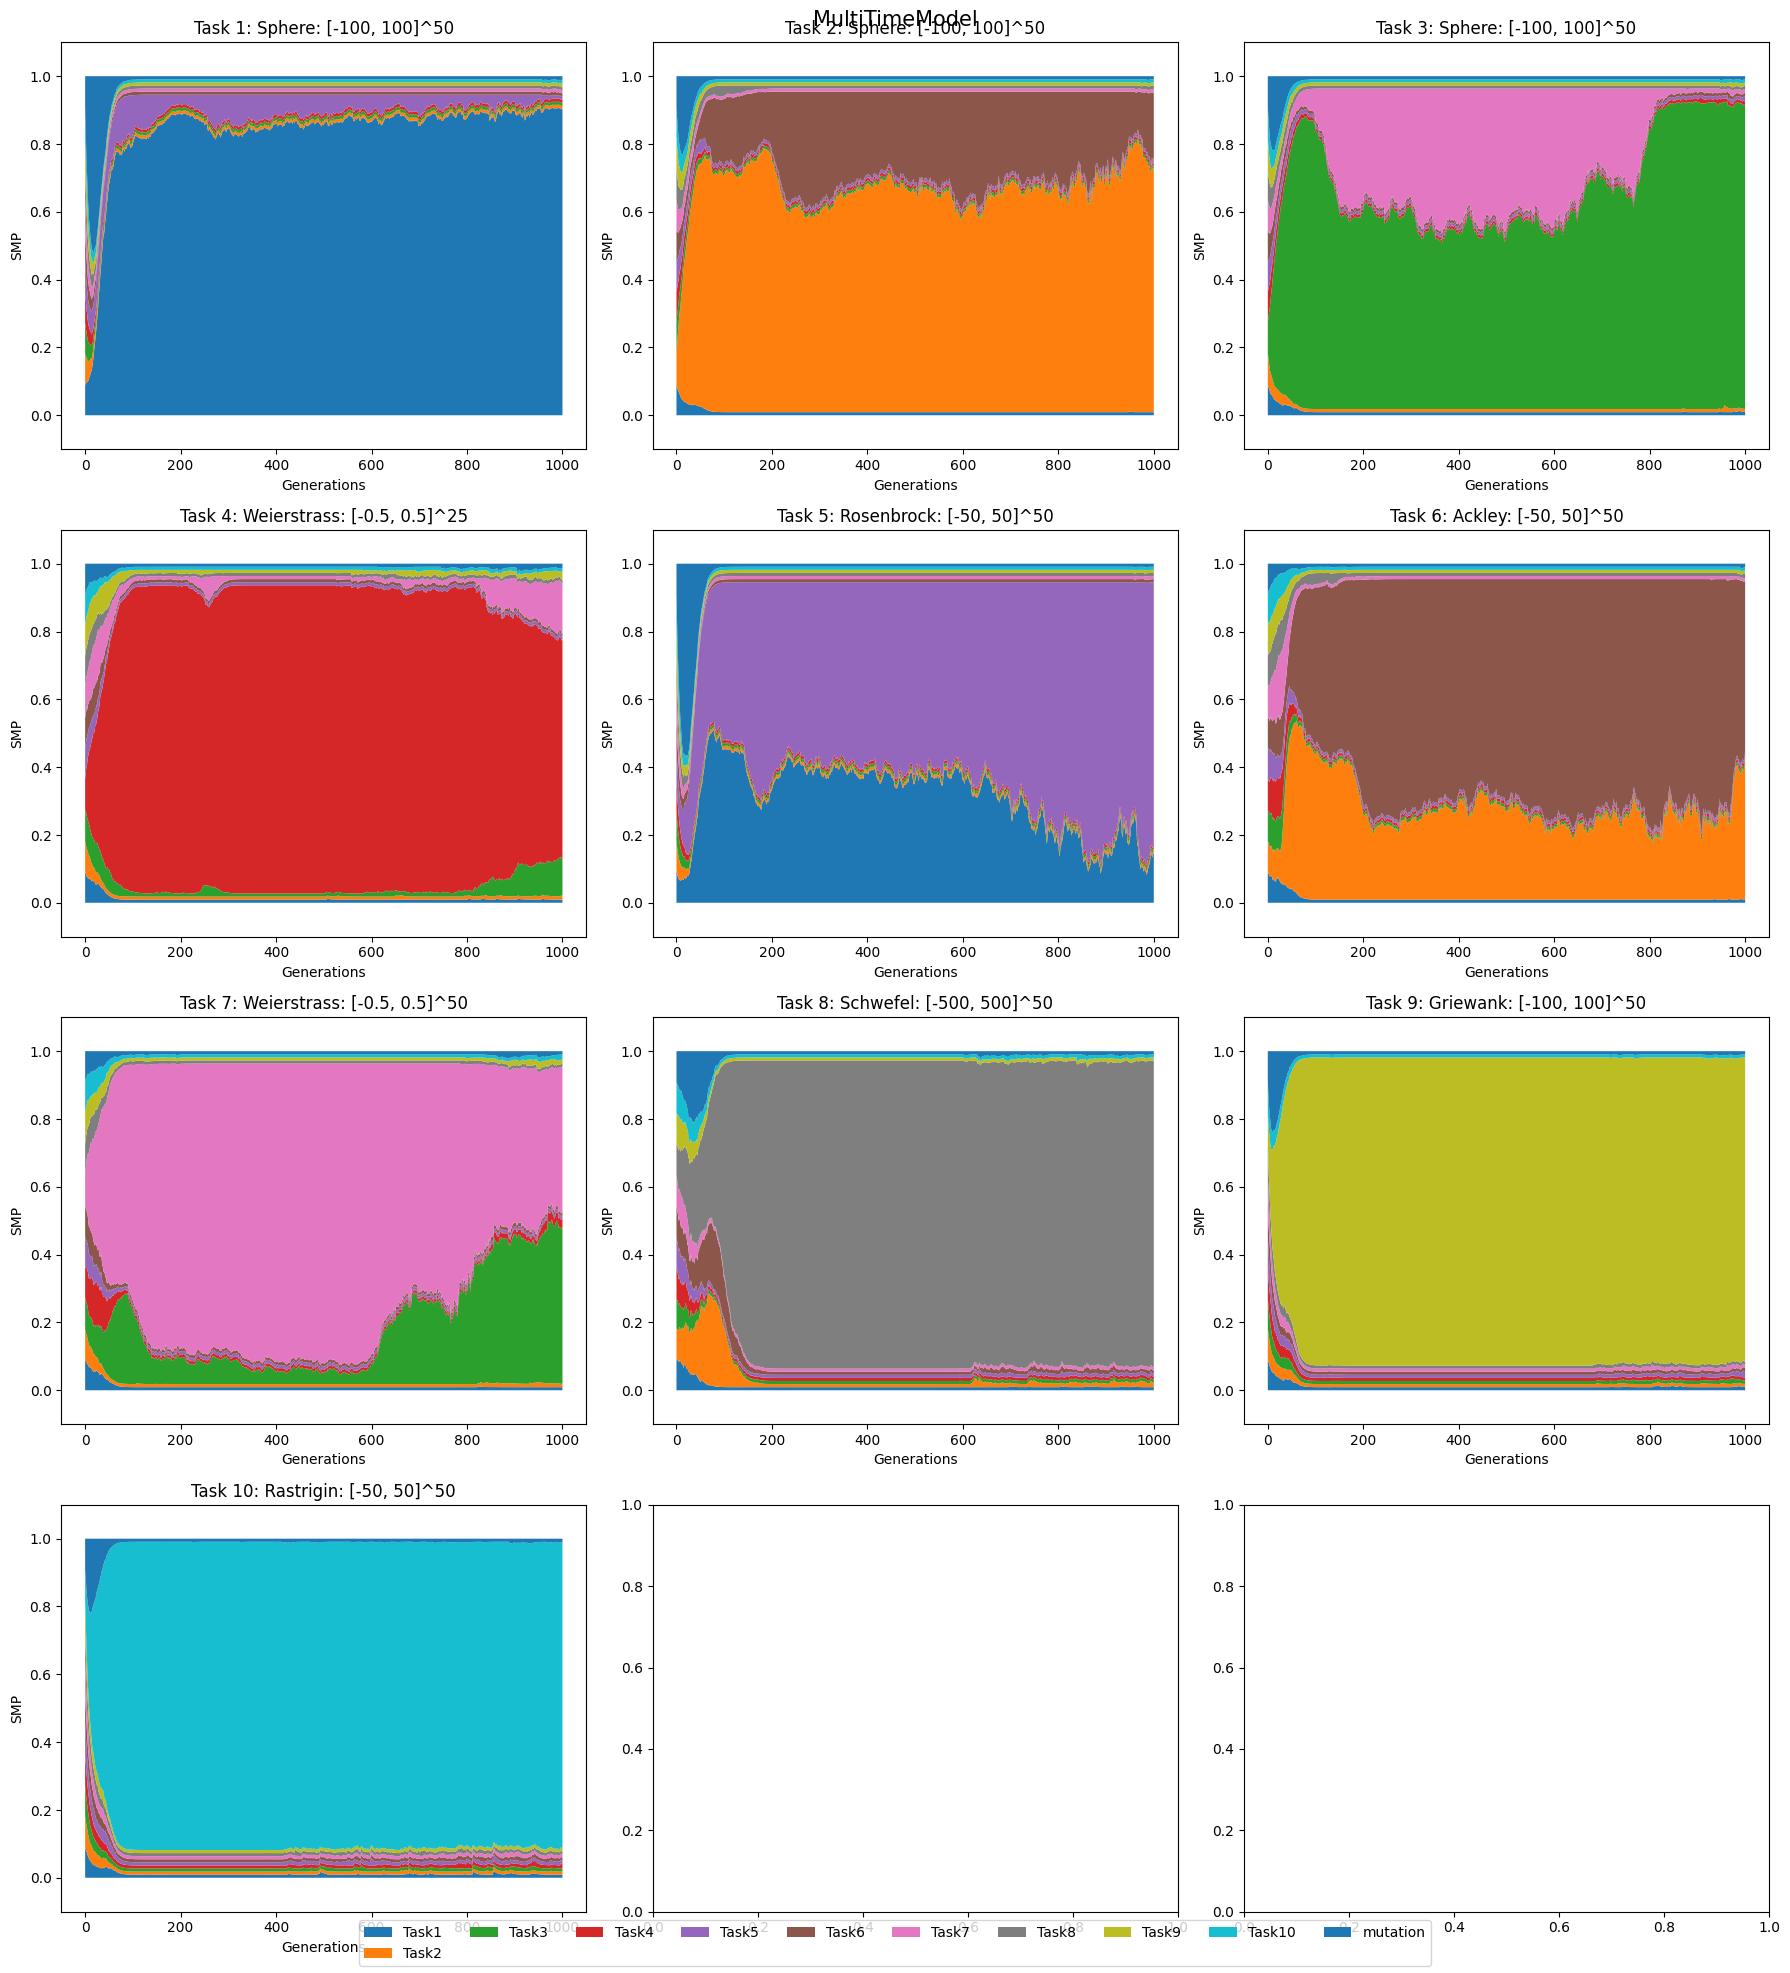

In [24]:
model.render_smp()

In [ ]:
model = loadModel("C:/Users/Admin/Downloads/virtual/GECCO/KL/SMP_LINEAR_pm_1/1.mso", ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(1)[0])

### Convert

#### Convert .mat -> mso

In [2]:
import scipy.io 
file_mat = scipy.io.loadmat('Data_MTEA-AD\MTEA_AD_10_1_datasum.mat')

In [11]:
dir_CEC_save_npy = "MTEA_AD_CEC17"
dir_GECCO_save_npy = "MTEA_AD_GECCO"

if os.path.isdir(dir_CEC_save_npy) is False: 
    os.makedirs(dir_CEC_save_npy)
if os.path.isdir(dir_GECCO_save_npy) is False:
    os.makedirs(dir_GECCO_save_npy)



In [18]:
BestFitness = file_mat.get('data')['BestFitness'][0][0] 
BestFitness.shape
time = file_mat.get('data')['wall_clock_time'][0][0] 
total_time = np.sum(time, axis=0) 

In [3]:
avg = file_mat.get('data')['EvBestFitness_evn'][0][0]

In [8]:
avg = file_mat.get('data')['EvBestFitness_evn'][0][0]
history_cost = np.zeros(shape=(1001, 10), dtype= "float")
for i in range(0, 1001):
    history_cost[i] = avg[i // 100]
all_his = np.zeros(shape=(30, 1001, 10), dtype='float') 
for i in range(30): 
    all_his[i] = history_cost

In [9]:
print(history_cost[-1])

[1.06093017e-07 2.99055267e-09 5.84163882e-12 5.63105118e-13
 1.16871453e-05 1.49350247e-05 5.11031294e-04 6.36708541e-04
 4.93075879e-04 1.76267492e+01]


In [13]:
all_his = np.zeros(shape=(30, 1001, 10), dtype='float') 
for i in range(30): 
    all_his[i] = history_cost

In [16]:
np.save(os.path.join(dir_CEC_save_npy, "MTEA_AD_CEC17_matlab"), all_his)

In [10]:
print(avg[-1])

[1.06093017e-07 2.99055267e-09 5.84163882e-12 5.63105118e-13
 1.16871453e-05 1.49350247e-05 5.11031294e-04 6.36708541e-04
 4.93075879e-04 1.76267492e+01]


In [26]:
ls_total_time = [] 

In [37]:
for i in range(1, 11): 
    file_mat = scipy.io.loadmat(f'Data_MTEA-AD\MTEA_AD_50_{i}_datasum.mat')
    avg = file_mat.get('data')['EvBestFitness_evn'][0][0]
    # print(avg.shape)
    # break
    history_cost = np.zeros(shape=(1001, 50), dtype= "float")
    for j in range(0, 1001):
        history_cost[j] = avg[i // 100]
    all_his = np.zeros(shape=(30, 1001, 50), dtype='float') 
    for k in range(30): 
        all_his[k] = history_cost
    ls_total_time.append(np.sum(file_mat.get('data')['wall_clock_time'][0][0], axis=0)[0])
    np.save(os.path.join(dir_GECCO_save_npy, f"MTEA_AD_GECCO_matlab_{i}"), all_his)

In [20]:
print(total_time[0])

1004.5383366


In [31]:
print(ls_total_time.)

AttributeError: 'list' object has no attribute 'shape'

In [5]:
np.save(os.path.join(dir_CEC_save_npy, "MTEA_AD_CEC17_matlab"), BestFitness)

#### Convert txt to mso

In [3]:
def save_Only_history_folder(path= "./", source= "./", ls_tasks = WCCI22_benchmark.get_50tasks_benchmark(1)[0]):
    for filename in os.listdir(source): 
        model  = loadModel(os.path.join(source, filename), ls_tasks= ls_tasks)
        model.history_smp = None 
        for model_com in model.ls_model: 
            model_com.history_smp = None 
        if os.path.isdir(path) is False: 
            os.makedirs(path)
        saveModel(model, os.path.join(path, filename), remove_tasks= True)
    pass 



In [4]:
def loadFileAndSave(source_path, target_path, model, remove_tasks: bool = False, history_cost_shape= (1000, 2), nb_runs = 1, ls_tasks = [], name_model = None, total_time= None ):
    '''
    File txt has the format of MTO competition.

    Load result from file txt and save it to .mso file
    
    Args: 
        remove_tasks: Do remove tasks when save model or not ? 
        history_cost_shape: The history cost shape in one run. 
        nb_runs: the number run of model 
        ls_tasks: list of tasks
        name_model (optional): that will be use as name to save the model 
    
    Results: 
        Save .mso file 
    '''
    data = pd.read_csv(source_path, header= None) 
    # data = pd.read_csv(source_path, header= None, delim_whitespace= True).astype("float") 

    if history_cost_shape[0] != len(data):
        # history_cost_shape[0] = len(data)
        history_cost_shape = (len(data), history_cost_shape[1])
        # print(f"history_cost_shape: {history_cost_shape[0]}, length_data: {len(data)}")
    
    if(history_cost_shape[1] * nb_runs != len(data[0])): 
        nb_runs = (data.shape[1] - 1) / history_cost_shape[1] 
        nb_runs = int(nb_runs)
    history_cost = np.zeros(shape = (nb_runs,history_cost_shape[0], history_cost_shape[1]))
    
    data_transpose = data.transpose() 
    count_row = 1
    for i_run in range(nb_runs): 
        for idx_task in range(len(ls_tasks)):
            history_cost[i_run, :,idx_task] = data_transpose.iloc[count_row, :]
            count_row += 1  
    
    avg_history_cost = np.average(history_cost, axis = 0) 
    assert avg_history_cost.shape == history_cost_shape 


    mutiltime_model = MultiTimeModel(model) 
    mutiltime_model.compile()
    mutiltime_model.tasks = None 
    mutiltime_model.history_cost = avg_history_cost
    mutiltime_model.nb_run = nb_runs 

    for run in range(nb_runs): 
        new_model = model.model() 
        new_model.history_cost = history_cost[run] 
        mutiltime_model.ls_model.append(new_model)
    if name_model is None:
        name_model = source_path.split("/")[-1].split(".")[0]
    
    if os.path.isdir(target_path) is False: 
        os.makedirs(target_path) 
    
    return saveModel(model= mutiltime_model, PATH= f"{target_path}/{name_model}.mso", remove_tasks= remove_tasks, total_time= total_time) 

    

In [25]:
# path = 
file = open("C:/Users/Admin/Downloads/RESULT/LSA_MaTGA_EBS_SBS_CEC17/SBS_GA_Results_benchmark_10/Benchmark_1/Result_SBS_GA.txt", 'r') 
full_data = file.readlines()
data = full_data[:-1]

# print(data[0])
time = float(full_data[-1].strip("\n").split(" ")[-1]) / 1e9 
tmp = open("tmp.txt", 'w')
tmp.writelines(data) 
target_path = "C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/ALL_RESULT/"
name_model = "SBS_GA_CEC17_JAVA"
loadFileAndSave(source_path= "tmp.txt",
                target_path=target_path, 
                model= AbstractModel, 
                remove_tasks= True,
                history_cost_shape= (1000, 10), 
                nb_runs= 30, 
                ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0],
                name_model=name_model, 
                total_time= time
                )


'Saved'

In [26]:
model = loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/ALL_RESULT/SBS_GA_CEC17_JAVA.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])

C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/ALL_RESULT/SBS_GA_CEC17_JAVA.mso


In [27]:
model.history_cost[-1]

array([2.44739948e-03, 1.26507418e-03, 5.39496185e-06, 2.17932157e-04,
       2.31851316e-01, 9.33697779e-03, 8.36819811e-03, 4.34756222e+01,
       7.39135312e-03, 5.03344744e+00])

In [28]:
model.ls_model[0].history_cost[-1]

array([4.37732779e-03, 1.56844594e-03, 5.97487840e-06, 4.98872053e-10,
       3.06281183e-01, 1.16189965e-02, 6.90167497e-03, 3.13679999e-02,
       1.48680883e-02, 2.43963782e+00])

In [29]:
print(model.total_time)

1641.0259455


In [ ]:
file = open("C:/Users/Admin/Downloads/RESULT/EBS_SBS_MaTGA/EBS_GA_Results_benchmark_50/Benchmark_1/Result_EBS_GA.txt", 'r') 
file.readlines()[-1].strip("\n").split(" ")[-1]

In [ ]:
model = loadModel("RESULTS\GECCO20_FULL_30_SEED\EBS_GA\EBS_GA_1.mso", ls_tasks=WCCI22_benchmark.get_50tasks_benchmark(2)[0])

In [ ]:
model.total_time

#### Convert npy to mso

In [15]:
def saveModel_from_npy(source, target, ls_tasks, model, remove_tasks = True, name_model = None, total_time= None):
    history_cost = np.load(source) 

    mutiltime_model = MultiTimeModel(model) 
    mutiltime_model.compile()
    mutiltime_model.tasks = None 
    mutiltime_model.history_cost = np.average(history_cost, axis= 0)
    mutiltime_model.nb_run = history_cost.shape[0]

    for run in range(history_cost.shape[0]): 
        new_model = model.model() 
        new_model.history_cost = history_cost[run] 
        mutiltime_model.ls_model.append(new_model)
    if name_model is None:
        name_model = source.split("/")[-1].split(".")[0]
        name_model = name_model.split("\\")[-1].split(".")[0]
        print(name_model)
    
    if os.path.isdir(target) is False: 
        os.makedirs(target) 
    print(target)
    return saveModel(model= mutiltime_model, PATH=os.path.join(target, name_model), remove_tasks= remove_tasks, total_time= total_time)
# source_dir = "./convert_npy/GECCO20/MaTDE/"
# target_dir = "./result_convert_from_npy/GECCO20/MaTDE/"
# model = AbstractModel

# for file_name in os.listdir(source_dir): 
#     saveModel_from_npy(
#                         source =os.path.join(source_dir, file_name), 
#                         target=target_dir, 
#                         model= model, 
#                         ls_tasks= CEC17_benchmark.get_2tasks_benchmark(1)[0],
#                         remove_tasks= True) 


In [21]:
saveModel_from_npy(source= "MTEA_AD_CEC17\MTEA_AD_CEC17_matlab.npy",
                    target=  "C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/ALL_RESULT",
                    model= AbstractModel, 
                    ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0],
                    remove_tasks= False, 
                    name_model="MTEA_AD_CEC17_matlab.mso",
                    total_time= total_time[0])

C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/ALL_RESULT


'Saved'

In [38]:
source_dir = "MTEA_AD_GECCO"
target_dir = "C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/"
model = AbstractModel

count =0 
for file_name in os.listdir(source_dir): 
    saveModel_from_npy(
                        source =os.path.join(source_dir, file_name), 
                        target=target_dir, 
                        model= model, 
                        ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(1)[0],
                        remove_tasks= False,
                        total_time= ls_total_time[count])
    count+=1  

MTEA_AD_GECCO_matlab_1
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/
MTEA_AD_GECCO_matlab_10
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/
MTEA_AD_GECCO_matlab_2
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/
MTEA_AD_GECCO_matlab_3
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/
MTEA_AD_GECCO_matlab_4
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/
MTEA_AD_GECCO_matlab_5
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/
MTEA_AD_GECCO_matlab_6
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/
MTEA_AD_GECCO_matlab_7
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/
MTEA_AD_GECCO_matlab_8
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/
MTEA_AD_GECCO_matlab_9
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/


In [41]:
model = loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/MTEA_AD_GECCO_MATLAB/MTEA_AD_GECCO_matlab_1.mso", ls_tasks=WCCI22_benchmark.get_50tasks_benchmark(1)[0])

In [42]:
model.history_cost.shape

(1001, 50)

In [44]:
model.total_time

2004.4262333

In [24]:
model2 = loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/MTEA_AD_cec17.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])

In [28]:
model2.history_cost

array([[1.16806898e+05, 3.26616104e+05, 3.15267767e+05, ...,
        1.75662829e+04, 8.15452789e+01, 8.15054288e+04],
       [2.41798963e+03, 1.67202323e+03, 3.06704557e+03, ...,
        4.85993356e+03, 1.67191987e+00, 1.15419334e+03],
       [2.41798963e+03, 1.67202323e+03, 3.06704557e+03, ...,
        4.85993356e+03, 1.67191987e+00, 1.15419334e+03],
       ...,
       [1.06093017e-07, 2.99055267e-09, 5.84163882e-12, ...,
        6.36708541e-04, 4.93075879e-04, 1.76267492e+01],
       [1.06093017e-07, 2.99055267e-09, 5.84163882e-12, ...,
        6.36708541e-04, 4.93075879e-04, 1.76267492e+01],
       [1.06093017e-07, 2.99055267e-09, 5.84163882e-12, ...,
        6.36708541e-04, 4.93075879e-04, 1.76267492e+01]])

In [22]:
model.total_time

9189.7651513

In [23]:
len(model.ls_model)

30

In [25]:
model.history_cost.shape

(50,)

In [ ]:
assert len(os.listdir("./convert_npy/CEC17_10tasks/")) == len(os.listdir("./result_convert_from_npy/CEC17_10tasks/"))

### Compare Model

#### Compare only result 

In [ ]:
save_Only_history_folder(path="C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/KL/MFEA",
                         source= "C:/Users/Admin/Downloads/RESULT/virtual/GECCO/KL/MFEA/",
                         ls_tasks=  WCCI22_benchmark.get_50tasks_benchmark(1)[0]
                         )

In [ ]:
C:\Users\Admin\Downloads\RESULT\Covert_ONLY_HISTORY\GECCO\GECCO20

In [23]:
compare = CompareResultBenchmark("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/GECCO20_SBX/", ls_benchmark=[WCCI22_benchmark.get_50tasks_benchmark(i)[0] for i in range(1, 11)])

(0 : EBS_GA)
(1 : LSA)
(2 : MaTDE)
(3 : MaTGA)
(4 : MFEA)
(5 : MTEA_AD_GECCO_MATLAB)
(6 : S-MFEA)
(7 : SBS_GA)


In [2]:
compare = CompareResultBenchmark("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/COMPARE_KL_GECCO_LSA/", ls_benchmark=[WCCI22_benchmark.get_50tasks_benchmark(i)[0] for i in range(1, 11)])

(0 : LSA_KL)
(1 : LSA_SBX)


In [4]:
compare = CompareResultBenchmark("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/COMPARE_KL_GECCO_S-MFEA/", ls_benchmark=[WCCI22_benchmark.get_50tasks_benchmark(i)[0] for i in range(1, 11)])

(0 : S-MFEA_KL)
(1 : S-MFEA_SBX)


In [14]:
compare = CompareResultBenchmark("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_LSA/", ls_benchmark=[CEC17_benchmark.get_10tasks_benchmark()[0] for i in range(1, 2)])

(0 : KL)
(1 : SBX)


In [11]:
compare = CompareResultBenchmark("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_MFEA/", ls_benchmark=[CEC17_benchmark.get_10tasks_benchmark()[0] for i in range(1, 2)])

(0 : KL)
(1 : SBX)


In [ ]:
compare = CompareResultBenchmark("./Covert_ONLY_HISTORY/GECCO/KL/", ls_benchmark=[WCCI22_benchmark.get_50tasks_benchmark(i)[0] for i in range(1, 11)])

In [15]:
compare.summarizing_compare_result(idx_main_algo=0, min_value=1e-6, idx_gener_compare=-1, total_generation=1000, combine=True)

C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_LSA/KL LSA_KL_CEC17_PYTHON_1.mso
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_LSA/KL\LSA_KL_CEC17_PYTHON_1.mso
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_LSA/SBX LSA_SBX_CEC17_JAVA_1.mso
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_LSA/SBX\LSA_SBX_CEC17_JAVA_1.mso


,Better,Equal,Worse
KL vs SBX,2,8,0


In [ ]:
compare.show_compare_detail(min_value= 1e-6, round=2, idx_main_algo=1)

In [ ]:
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17

#### Compare convergence trend

In [21]:
path = "C:\Users\Admin\Downloads\RESULT\Covert_ONLY_HISTORY\CEC17\COMPARE_KL_SBX_MFEA\KL\MFEA_1.mso"
path = path.split("\\")
path = "/".join(path)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (4099425984.py, line 1)

In [2]:
model = loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_S-MFEA/KL/S-MFEA_KL_CEC17_PYTHON.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])
print(model.history_cost[-1])

C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_S-MFEA/KL/S-MFEA_KL_CEC17_PYTHON.mso
[2.05529071e-23 2.26451463e-26 0.00000000e+00 0.00000000e+00
 4.14082570e-16 4.33135009e-14 0.00000000e+00 6.36378325e-04
 0.00000000e+00 0.00000000e+00]


In [9]:
print("u: ", getattr(getattr(model, "crossover"), "u"))
print("conf_thres: ", getattr(getattr(model, "crossover"), "conf_thres"))
print("random_percent: ", getattr(getattr(model, "selection"), "random_percent"))
print("nb_inds_min: ", getattr(model, "nb_inds_min"))
print("p_const_intra: ", getattr(model, "p_const_intra"))


u:  0.01
conf_thres:  1
random_percent:  0.0
nb_inds_min:  20
p_const_intra:  0.0


C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_LSA/SBX/LSA_SBX_CEC17_JAVA_1.mso
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_MFEA/KL/MFEA_1.mso
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_MFEA/SBX/MFEA_cec17_1.mso
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_LSA/KL/LSA_KL_CEC17_PYTHON_1.mso
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_S-MFEA/SBX/S-MFEA_CEC17_PYTHON.mso
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_S-MFEA/KL/S-MFEA_KL_CEC17_PYTHON.mso


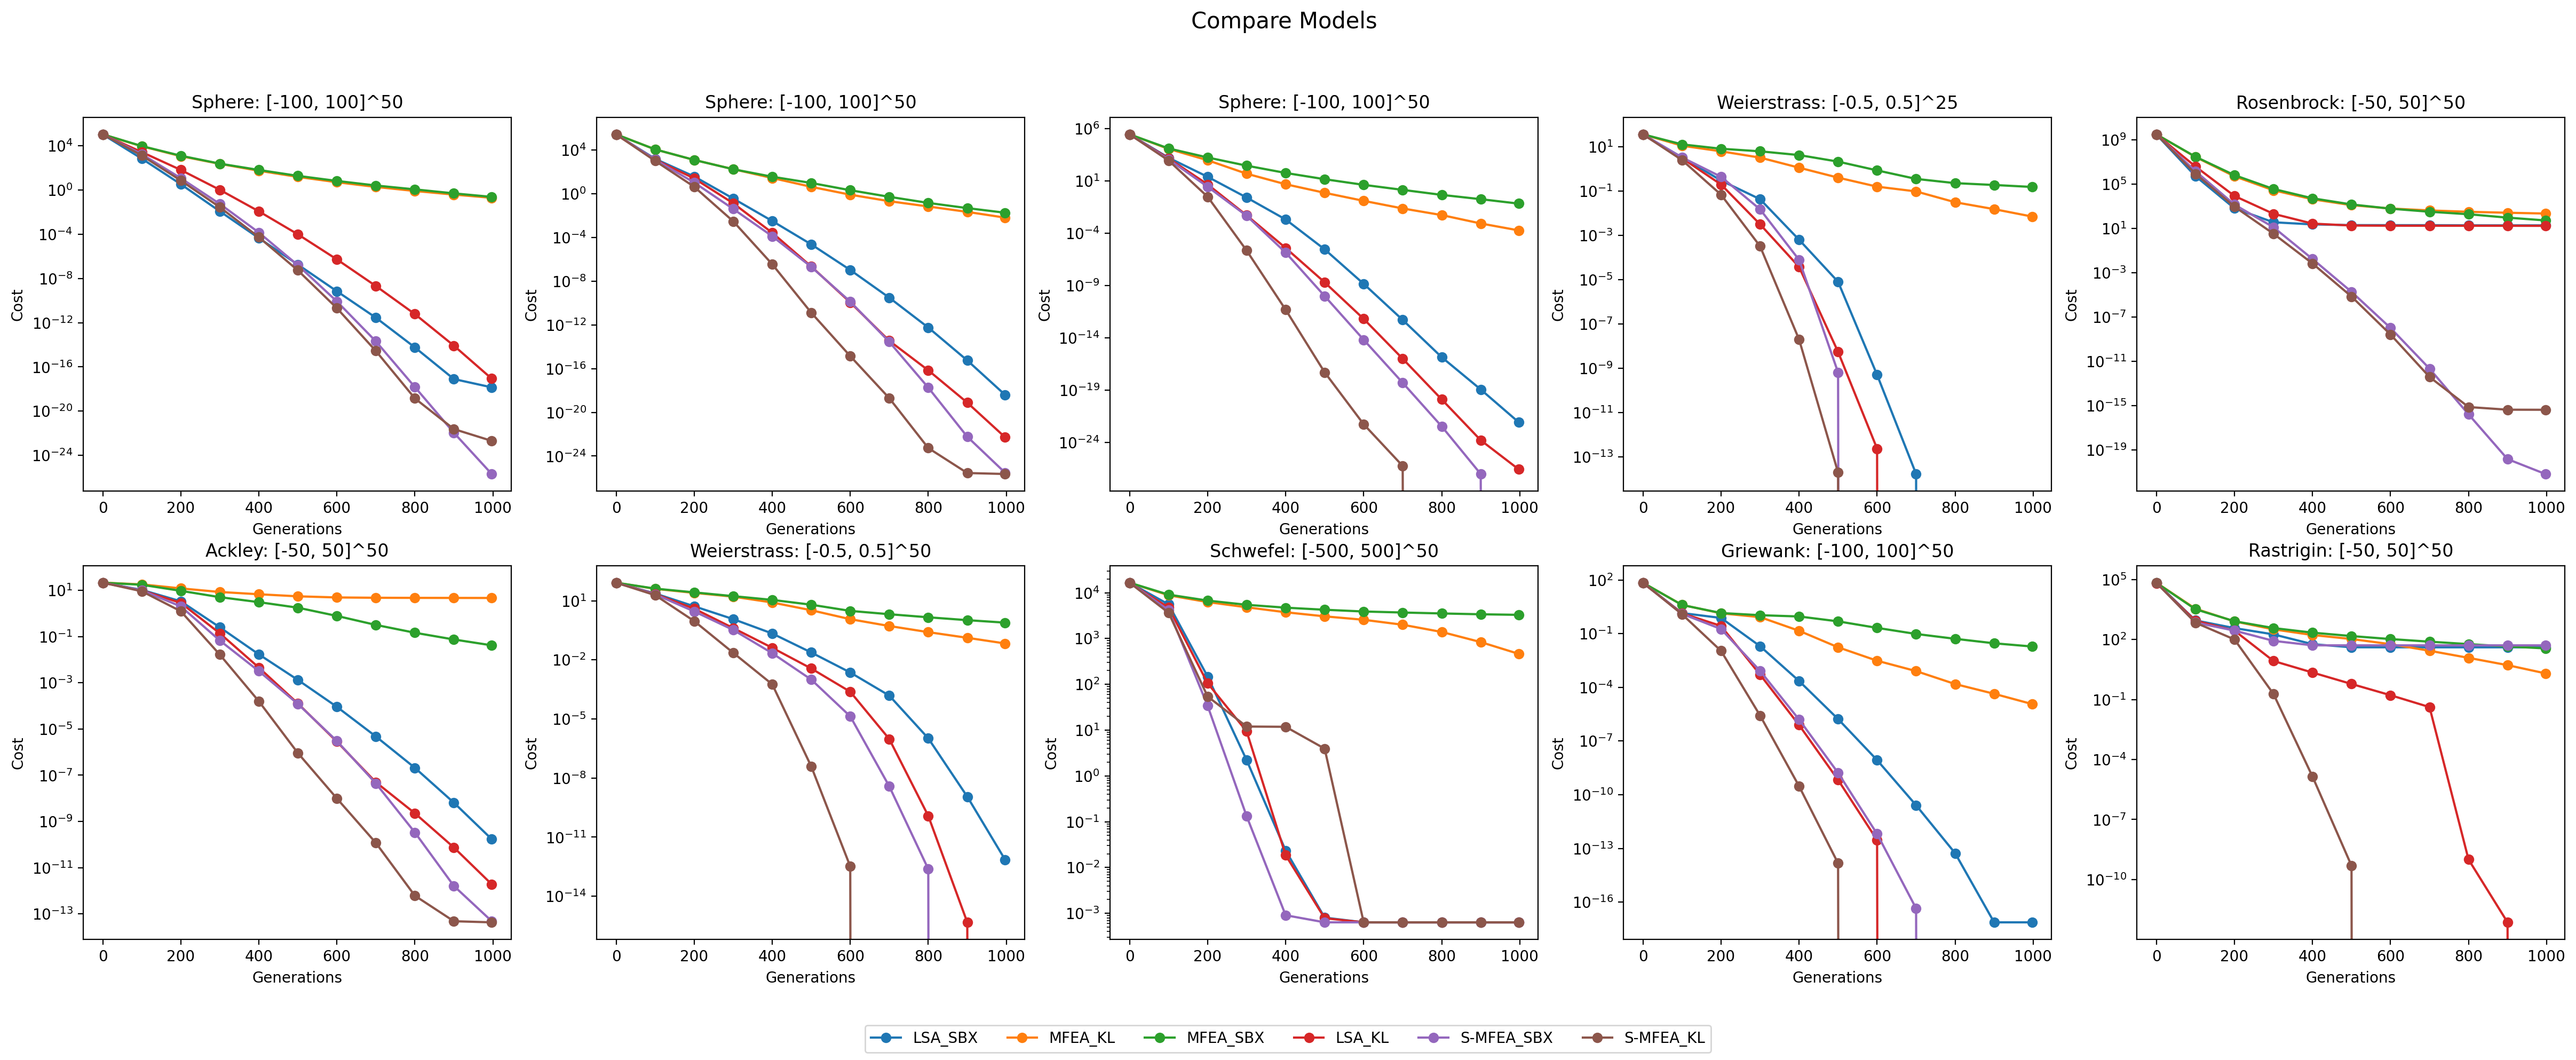

In [23]:
'''Compare between (MODEL + KL) with (MODEL + SBX)'''

compare= CompareModel(
    models = [
        # loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/LSA_KL_1s.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]), 
        
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_LSA/SBX/LSA_SBX_CEC17_JAVA_1.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_MFEA/KL/MFEA_1.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_MFEA/SBX/MFEA_cec17_1.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_LSA/KL/LSA_KL_CEC17_PYTHON_1.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_S-MFEA/SBX/S-MFEA_CEC17_PYTHON.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_S-MFEA/KL/S-MFEA_KL_CEC17_PYTHON.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),


    ],
    label= ["LSA_SBX", "MFEA_KL", "MFEA_SBX", "LSA_KL", "S-MFEA_SBX", "S-MFEA_KL"] 
)
compare.render(
    shape=(2,5), 
    min_cost= 0, 
    step=100, 
    yscale='log'
)

In [31]:
model = loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/S-MFEA_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])

C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/S-MFEA_CEC17_PYTHON.mso


In [34]:
model.ls_model[3] = model.ls_model[0]
model.ls_model[21] = model.ls_model[0]

In [36]:
model.set_attribute()

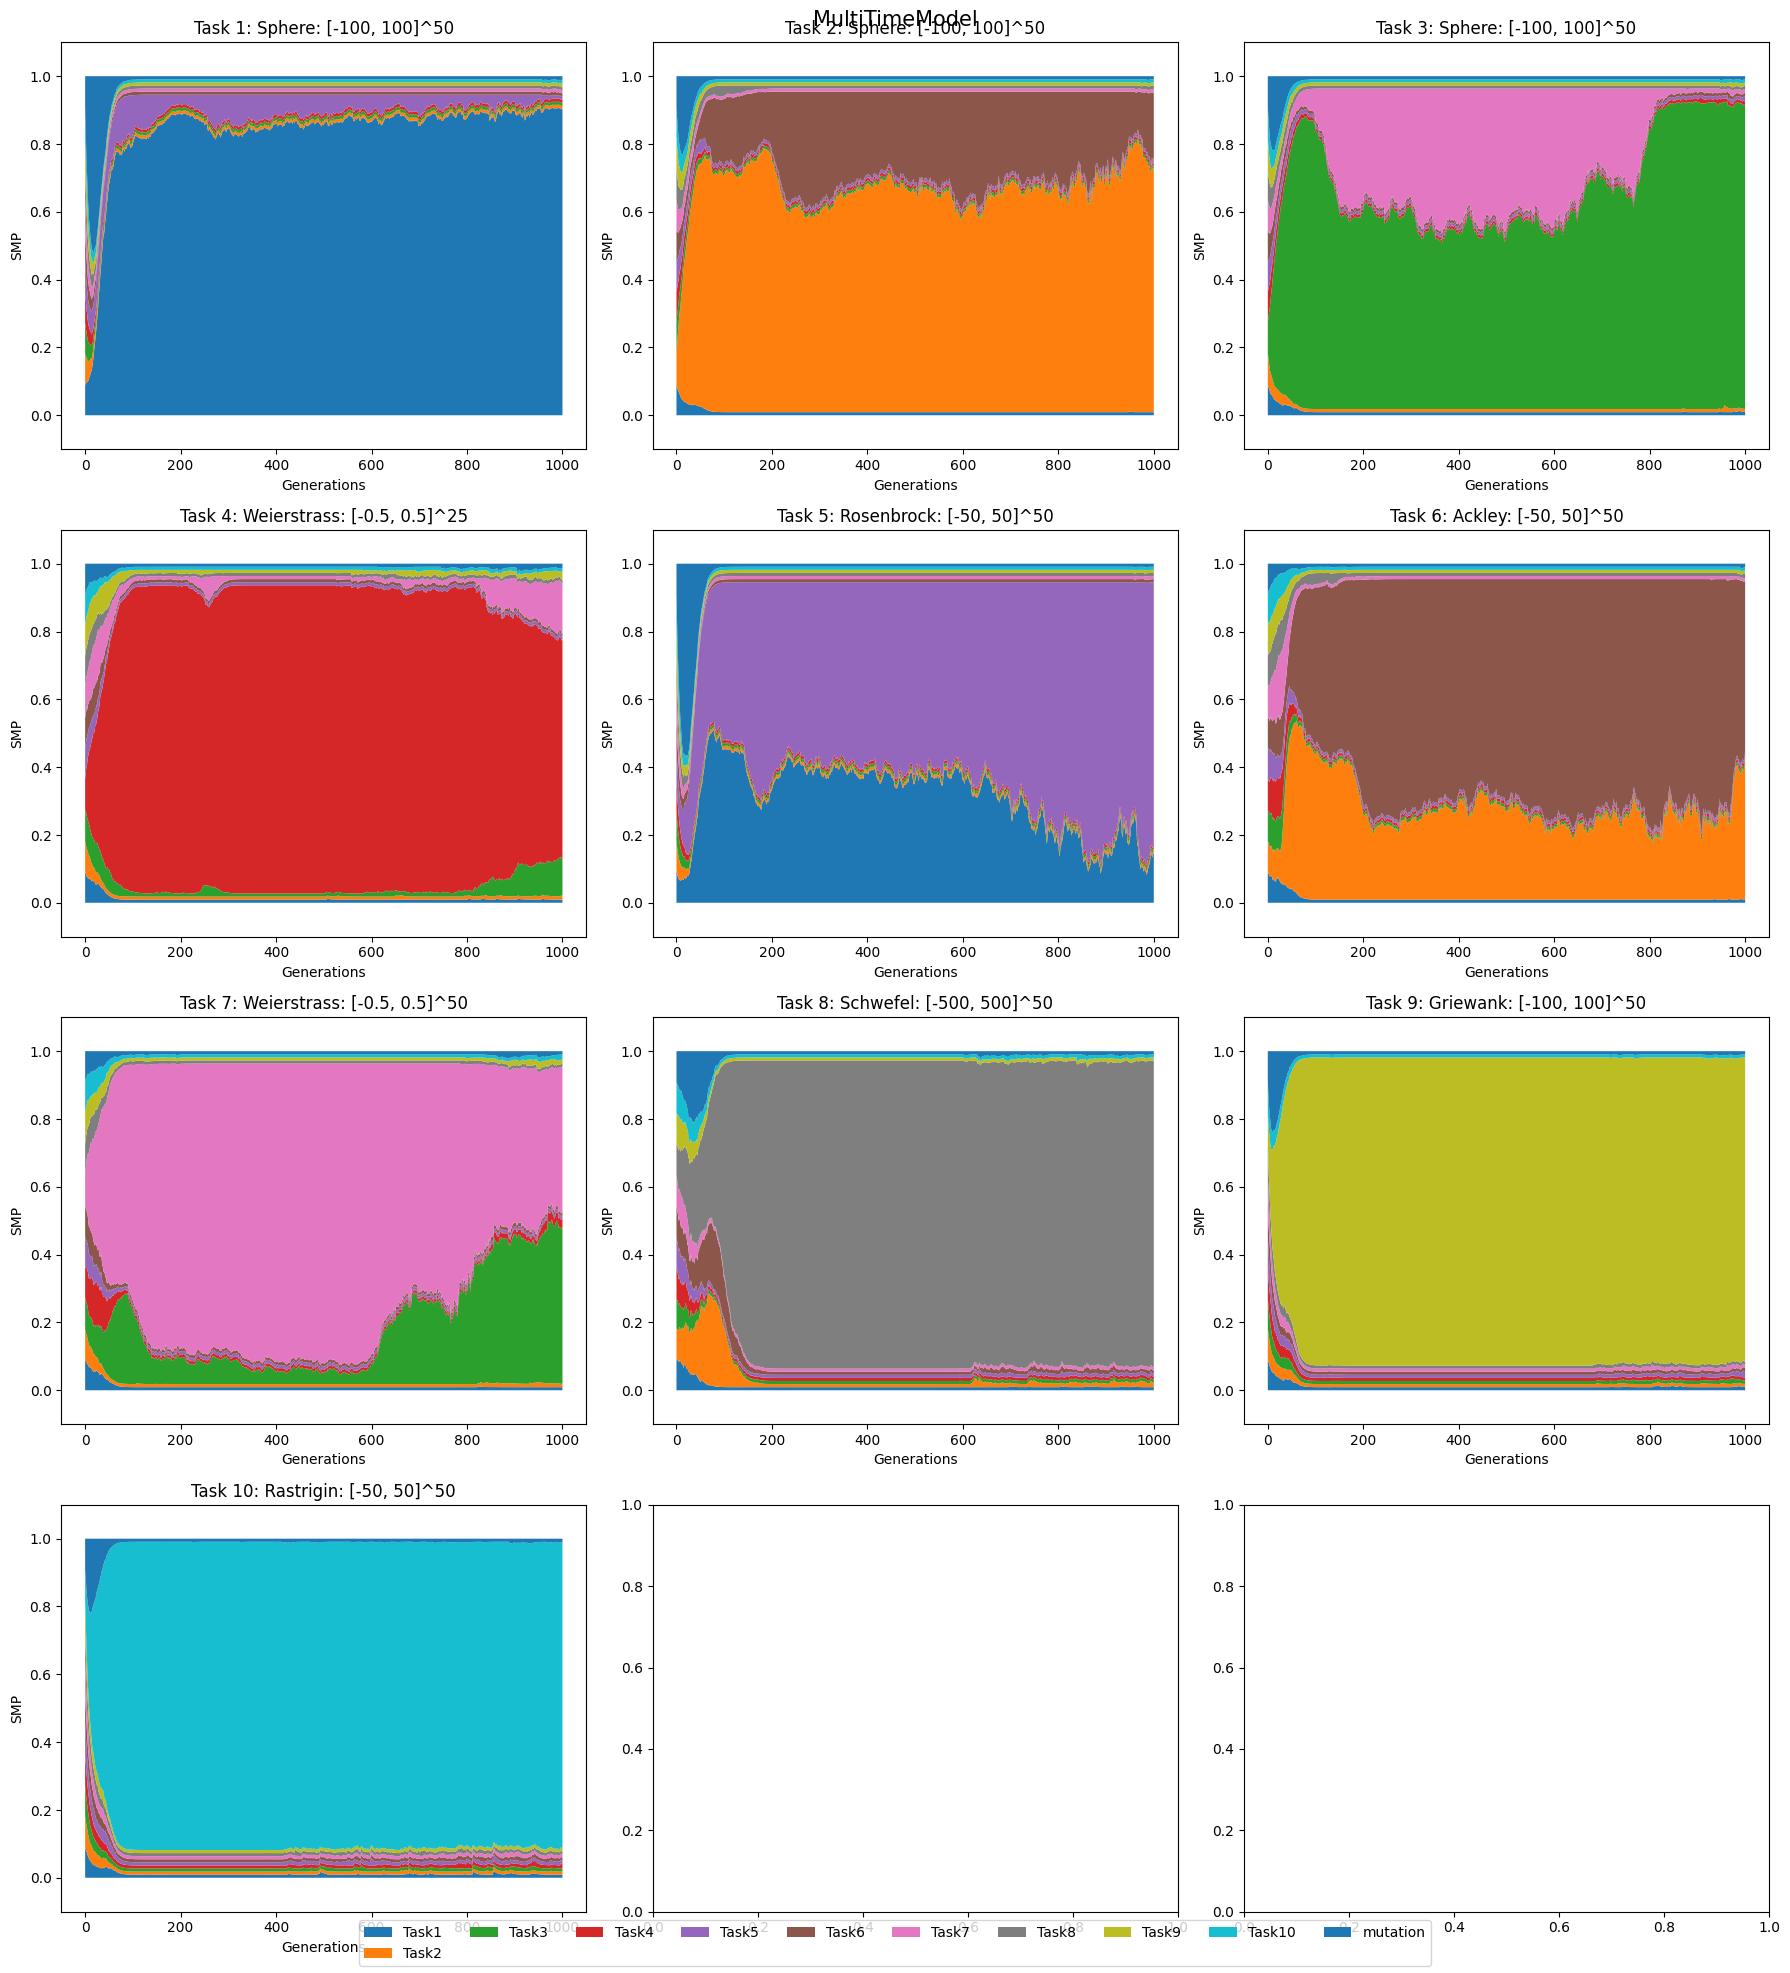

In [37]:
model.render_smp()

In [29]:
file= open("tmp.txt", 'w') 
for i in model.history_cost[-1]:
    file.writelines(f"{i}\n")
file.close()

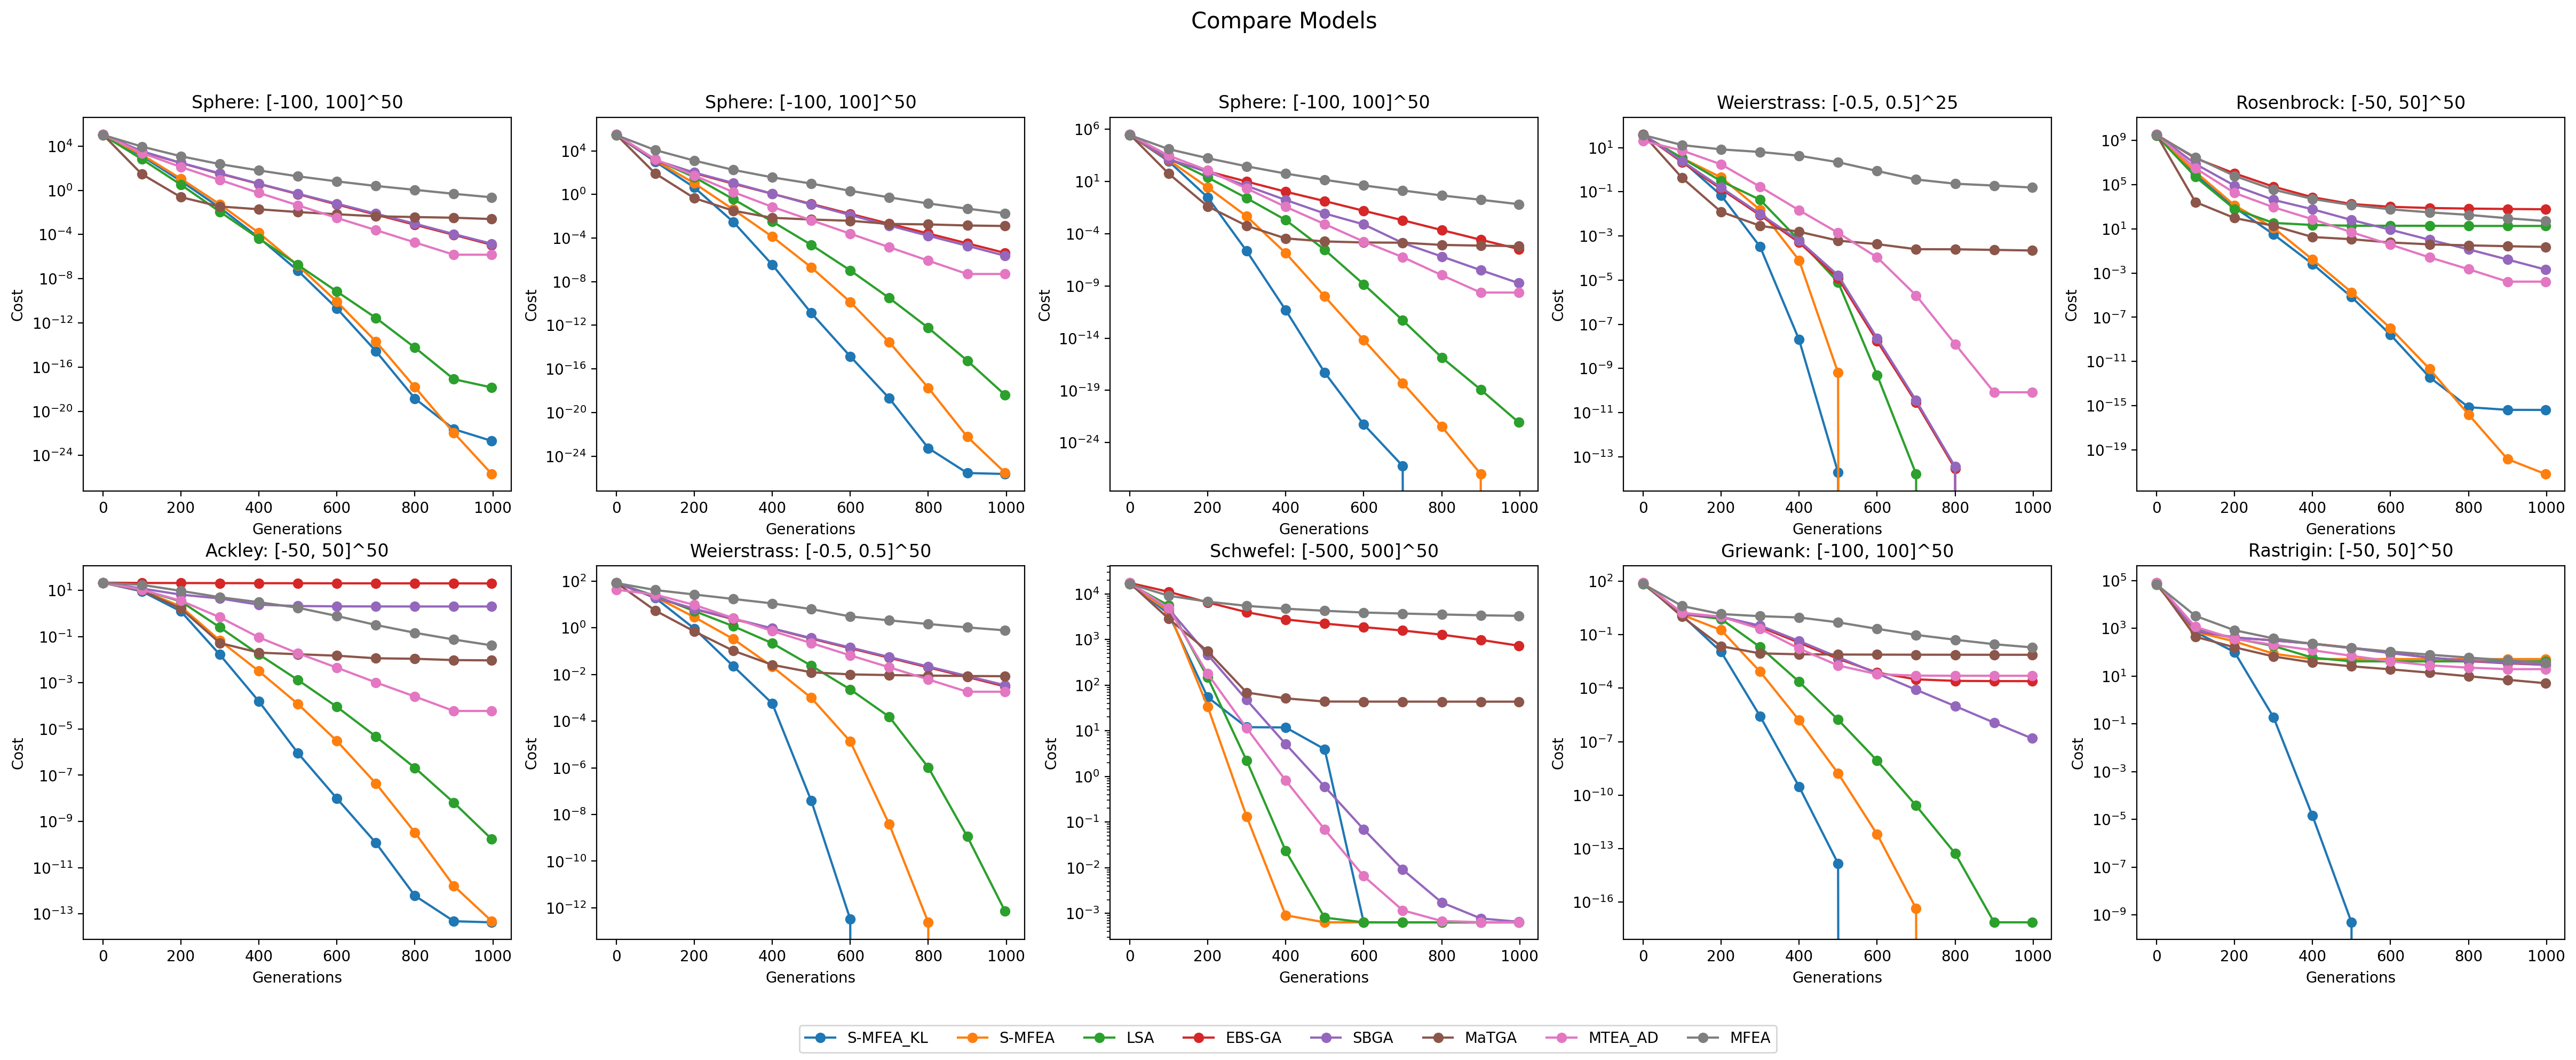

In [23]:
'''Compare between S-MFEA with other MODEL'''

compare= CompareModel(
    models = [
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/S-MFEA_KL_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/S-MFEA_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/LSA_CEC17_JAVA.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/EBS_GA_CEC17_JAVA.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/SBS_GA_CEC17_JAVA.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/MaTGA_CEC17_JAVA.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/MTEA_AD_CEC17_matlab.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/MFEA_cec17.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),

    ],
    label= ["S-MFEA_KL", 'S-MFEA', 'LSA', 'EBS-GA', 'SBGA', 'MaTGA', 'MTEA_AD', 'MFEA'] 
)
compare.render(
    shape=(2,5), 
    min_cost= 0, 
    step=100, 
    yscale='log'
)

In [ ]:
compare= CompareModel(
    models = [
        # loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/LSA_KL_1s.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]), 
        loadModel("./result_convert_from_npy/CEC17_10tasks/LSA_cec17.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/MFEA_KL.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("./result_convert_from_npy/CEC17_10tasks/MFEA_cec17.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("D:/OneDrive - Hanoi University of Science and Technology/My_self/Temporary/11-11-22/virtual/GECCO20/CEC17/LSA/cec17.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("D:/OneDrive - Hanoi University of Science and Technology/My_self/Temporary/11-11-22/virtual/GECCO20/CEC17/SMP_LINEAR_pm_1/cec17.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("D:/OneDrive - Hanoi University of Science and Technology/My_self/Temporary/11-11-22/virtual/GECCO20/CEC17/SMP_LINEAR_KL_pm_1/cec17.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),

    ],
    label= ["LSA_SBX", "MFEA_KL", "MFEA_SBX", "LSA_KL", "S-MFEA_SBX", "S-MFEA_KL"] 
)
compare.render(
    shape=(2,5), 
    min_cost= 0, 
    step=100, 
    yscale='log'
)

In [ ]:
model = loadModel("./result_convert_from_npy/CEC17_10tasks/smp_linear.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])

In [ ]:
[model.ls_model[i].history_cost[-1][8] for i in range(30)]

In [ ]:
2getattr(model, 'nb_inds_min')

### OTHERS